<a href="https://colab.research.google.com/github/Kishan459/hotel-booking-analysis/blob/main/kishan_Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
hotel_df = pd.read_csv("/content/drive/MyDrive/AlmaBetter/Module- 01/Capstone Project/Hotel Bookings.csv")

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel_df.shape

(119390, 32)

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

##company and agent column contains lots of null values so i am removing them from the data set.

In [ ]:
hotel_df= hotel_df.drop(['company','agent'], axis=1)

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# 1.  Which Month is most prefered by the Group and Transient type customers?

In [ ]:
# making a new data frame according to the question
new_df = hotel_df[['arrival_date_month','customer_type']]

In [ ]:
new_df.head()

,arrival_date_month,customer_type
0,July,Transient
1,July,Transient
2,July,Transient
3,July,Transient
4,July,Transient


In [ ]:
customer_type_df = new_df.groupby('arrival_date_month')['customer_type'].value_counts().unstack()
print(customer_type_df)

customer_type       Contract  Group  Transient  Transient-Party
arrival_date_month                                             
April                    163     32       8616             2278
August                   699     59      10493             2626
December                 175     49       5335             1221
February                  49     49       6376             1594
January                   26     40       4824             1039
July                     537     21       9829             2274
June                     319     39       8767             1814
March                     61     40       7723             1970
May                      264     46       9074             2407
November                 211     61       5233             1289
October                  737     86       6894             3443
September                835     55       6449             3169


In [ ]:
group_df =  customer_type_df['Group'].reset_index()
print(group_df)

   arrival_date_month  Group
0               April     32
1              August     59
2            December     49
3            February     49
4             January     40
5                July     21
6                June     39
7               March     40
8                 May     46
9            November     61
10            October     86
11          September     55


In [ ]:
group_df= group_df.set_index('arrival_date_month')
print(group_df)

                    Group
arrival_date_month       
April                  32
August                 59
December               49
February               49
January                40
July                   21
June                   39
March                  40
May                    46
November               61
October                86
September              55


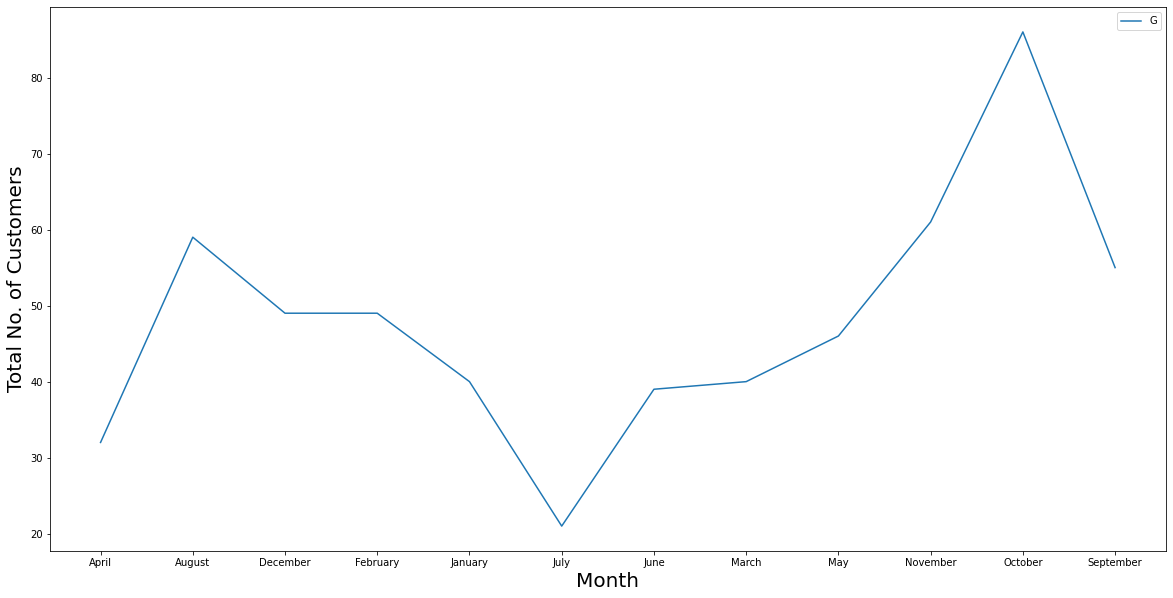

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(group_df)
plt.xlabel('Month',size = 20)
plt.ylabel('Total No. of Customers',size = 20)
plt.legend('Group')
plt.show()

# October Month is most prefered by the group customer type.
# July least prefered by the Group customer type.

In [ ]:
transient_df =  customer_type_df['Transient'].reset_index()
print(transient_df)

   arrival_date_month  Transient
0               April       8616
1              August      10493
2            December       5335
3            February       6376
4             January       4824
5                July       9829
6                June       8767
7               March       7723
8                 May       9074
9            November       5233
10            October       6894
11          September       6449


In [ ]:
transient_df= transient_df.set_index('arrival_date_month')
print(transient_df)

                    Transient
arrival_date_month           
April                    8616
August                  10493
December                 5335
February                 6376
January                  4824
July                     9829
June                     8767
March                    7723
May                      9074
November                 5233
October                  6894
September                6449


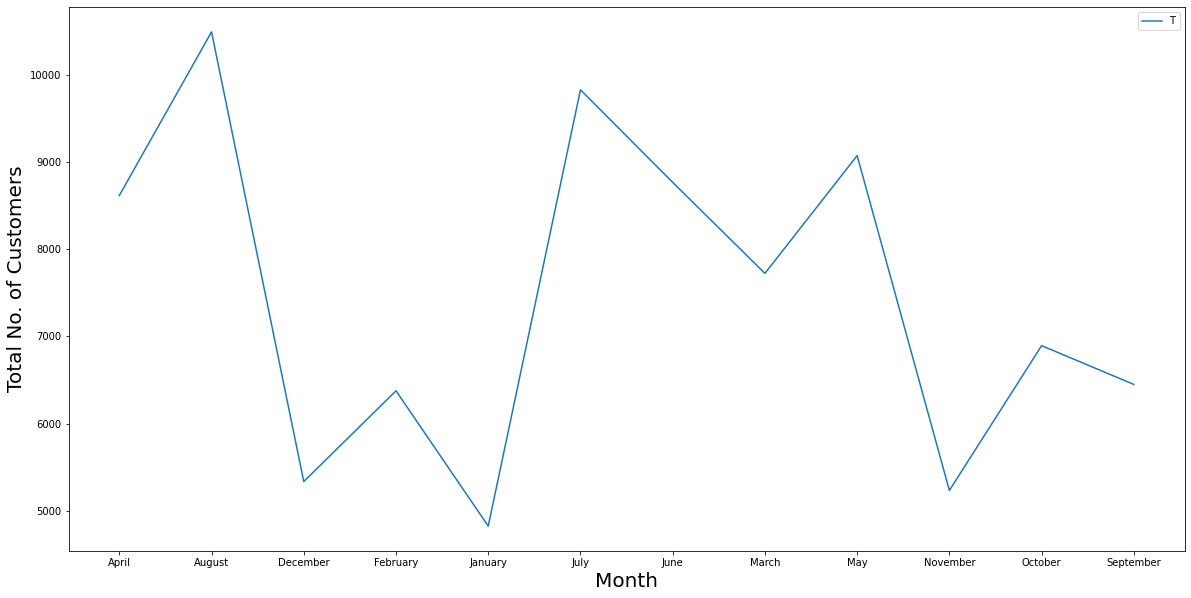

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(transient_df)
plt.xlabel('Month',size=20)
plt.ylabel('Total No. of Customers',size=20)
plt.legend('Transient')
plt.show()

## Auguast months are most prefered by Transient Customer type
## January least prefered by Transient


#2. In which month most no. of cancellation occured?


In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 30 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [ ]:
cancle_df = hotel_df[['arrival_date_month','is_canceled','previous_cancellations']]

In [ ]:
cancle_df.head()

,arrival_date_month,is_canceled,previous_cancellations
0,July,0,0
1,July,0,0
2,July,0,0
3,July,0,0
4,July,0,0


In [ ]:
cancle_df.set_index('arrival_date_month',inplace=True)

In [ ]:
cancle_df.head()

,is_canceled,previous_cancellations
arrival_date_month,,
July,0,0
July,0,0
July,0,0
July,0,0
July,0,0


In [ ]:
cancle_df = cancle_df.groupby('arrival_date_month')['is_canceled'].value_counts().unstack().rename(columns={0:'not_cancled',1:'actually_cancled'})
print(cancle_df)

is_canceled         not_cancled  actually_cancled
arrival_date_month                               
April                      6565              4524
August                     8638              5239
December                   4409              2371
February                   5372              2696
January                    4122              1807
July                       7919              4742
June                       6404              4535
March                      6645              3149
May                        7114              4677
November                   4672              2122
October                    6914              4246
September                  6392              4116


In [ ]:
actually_cancled = cancle_df['actually_cancled']
print(actually_cancled)

arrival_date_month
April        4524
August       5239
December     2371
February     2696
January      1807
July         4742
June         4535
March        3149
May          4677
November     2122
October      4246
September    4116
Name: actually_cancled, dtype: int64


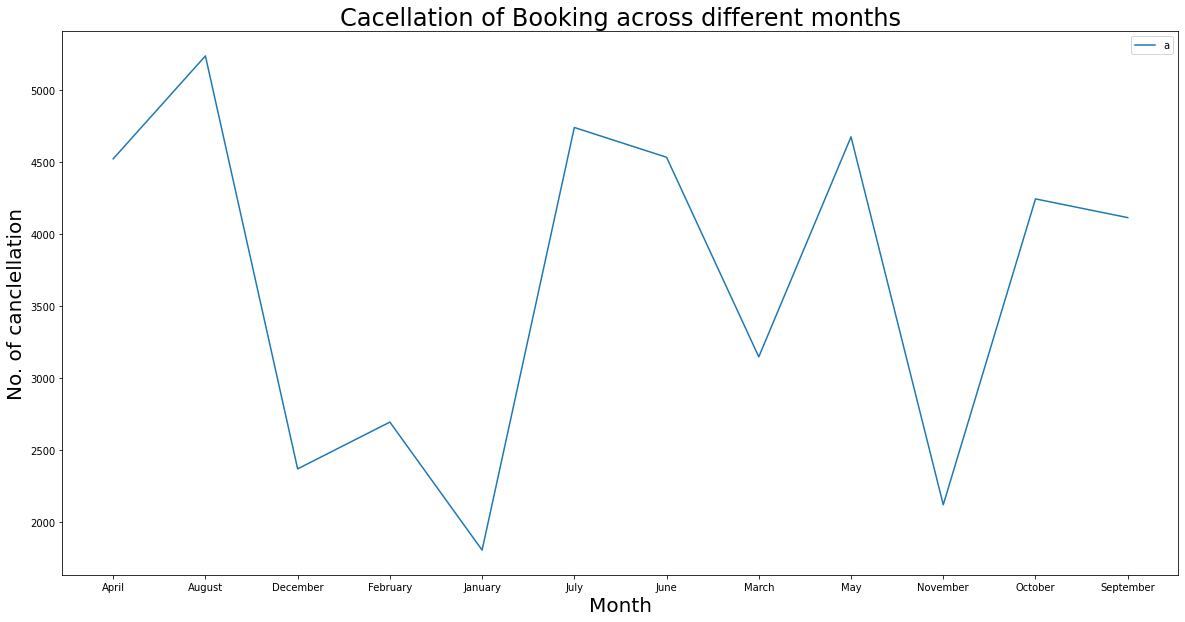

In [ ]:
plt.figure(figsize=(20,10))
plt.plot(actually_cancled)
plt.xlabel('Month',size=20)
plt.ylabel('No. of canclellation',size=20)
plt.legend('actually_cancled')
plt.title("Cacellation of Booking across different months",size=24)
plt.show()


# Most numbers of canclellation occured in August.

#3. What customer type cancel the most bookings?

In [ ]:
hotel_df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
67303,City Hotel,1,46,2017,May,18,1,1,3,1,1.0,0,BB,CHN,Online TA,TA/TO,0,0,0,A,A,3,No Deposit,0,Transient,153.09,0,0,Canceled,3/17/2017
49874,City Hotel,1,265,2016,April,17,20,0,4,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,101.00,0,0,Canceled,7/30/2015
19898,Resort Hotel,0,1,2016,January,2,7,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,29.00,1,0,Check-Out,1/8/2016
87038,City Hotel,0,76,2016,April,16,10,2,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,1,No Deposit,0,Transient-Party,90.95,0,1,Check-Out,4/14/2016
105131,City Hotel,0,38,2017,January,5,29,1,0,2,0.0,0,BB,BRA,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,84.08,1,2,Check-Out,1/30/2017
7491,Resort Hotel,1,121,2016,August,33,12,1,2,2,0.0,0,BB,PRT,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,189.00,0,0,Canceled,6/19/2016
39388,Resort Hotel,0,197,2017,August,33,13,2,2,2,0.0,0,BB,FRA,Offline TA/TO,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient-Party,110.70,0,0,Check-Out,8/17/2017
20458,Resort Hotel,0,32,2016,January,5,27,0,2,2,0.0,0,BB,CHN,Online TA,TA/TO,0,0,0,E,E,1,No Deposit,0,Transient,52.80,0,1,Check-Out,1/29/2016
55106,City Hotel,1,181,2016,August,32,4,2,5,2,1.0,0,BB,PRT,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,129.70,0,2,Canceled,2/20/2016
30368,Resort Hotel,0,3,2016,November,47,19,0,1,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,F,0,No Deposit,0,Transient-Party,34.00,0,1,Check-Out,11/20/2016


In [ ]:
df = hotel_df[['customer_type','is_canceled']]

In [ ]:
df.sample(10)

,customer_type,is_canceled
114285,Transient,0
72726,Transient,1
104145,Transient,0
20416,Transient,0
29137,Transient,0
65147,Transient,1
26697,Transient,0
90573,Transient-Party,0
60499,Transient,1
119199,Transient-Party,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 2 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   customer_type  119390 non-null  object
 1   is_canceled    119390 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.8+ MB


In [ ]:
df = df.groupby('customer_type')['is_canceled'].value_counts().unstack().rename(columns={0:'not_cancled',1:'actually_cancled'})

In [ ]:
df.head()

is_canceled,not_cancled,actually_cancled
customer_type,,
Contract,2814,1262
Group,518,59
Transient,53099,36514
Transient-Party,18735,6389


In [ ]:
cancle_df = df['actually_cancled']

In [ ]:
cancle_df

customer_type
Contract            1262
Group                 59
Transient          36514
Transient-Party     6389
Name: actually_cancled, dtype: int64

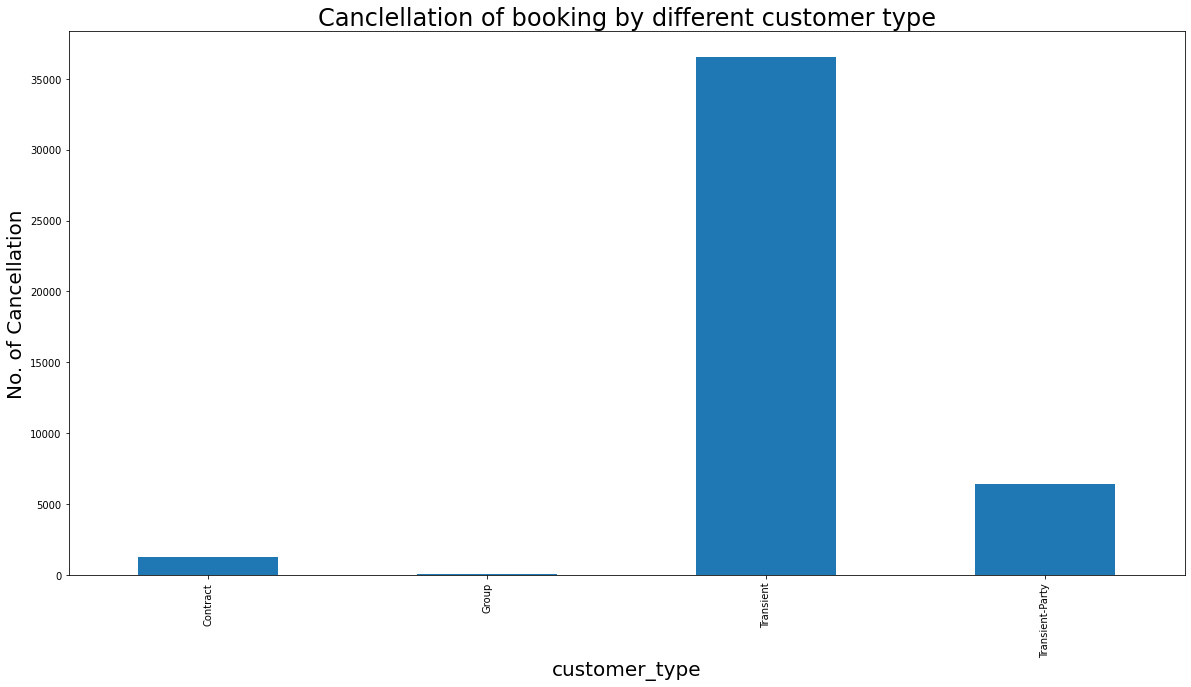

In [ ]:
plt.figure(figsize=(20,10))
cancle_df.plot(kind='bar')
plt.xlabel('customer_type',size=20)
plt.ylabel('No. of Cancellation', size = 20)
plt.title("Canclellation of booking by different customer type",size = 24)
plt.show()

#most number of canclellation is done by Transient customer type

#4.  Which market segment got canceled the most?

In [ ]:
hotel_df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
108019,City Hotel,0,78,2017,March,11,18,2,2,2,0.0,0,BB,CN,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,100.30,0,3,Check-Out,3/22/2017
31902,Resort Hotel,0,0,2017,January,2,10,0,1,2,0.0,0,BB,ESP,Online TA,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient,48.00,0,0,Check-Out,1/11/2017
7429,Resort Hotel,1,65,2016,August,33,8,3,9,2,0.0,0,BB,ESP,Direct,Direct,0,0,0,C,C,0,No Deposit,0,Transient,222.50,0,0,Canceled,6/6/2016
65831,City Hotel,1,66,2017,April,15,9,2,0,2,0.0,0,BB,PRT,Groups,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,100.00,0,0,Canceled,2/2/2017
2522,Resort Hotel,0,75,2015,October,43,20,0,5,3,0.0,0,BB,GBR,Offline TA/TO,TA/TO,0,0,0,A,C,0,No Deposit,0,Contract,67.15,0,1,Check-Out,10/25/2015
15242,Resort Hotel,0,0,2017,April,17,26,0,1,1,0.0,0,BB,PRT,Corporate,Corporate,1,0,10,A,G,0,No Deposit,0,Transient,48.50,1,0,Check-Out,4/27/2017
24356,Resort Hotel,0,40,2016,May,21,17,0,2,2,0.0,0,BB,FRA,Groups,TA/TO,0,0,0,A,D,0,No Deposit,0,Transient-Party,46.00,0,0,Check-Out,5/19/2016
59943,City Hotel,1,19,2016,November,45,4,0,1,2,0.0,0,BB,AGO,Online TA,TA/TO,0,0,0,D,D,0,No Deposit,0,Transient,130.00,0,1,Canceled,10/25/2016
68458,City Hotel,1,115,2017,May,20,18,0,3,2,0.0,0,BB,PRT,Offline TA/TO,TA/TO,0,0,0,A,A,0,Non Refund,0,Transient,190.00,0,0,Canceled,1/23/2017
74201,City Hotel,1,363,2015,October,42,15,0,2,2,0.0,0,BB,PRT,Groups,TA/TO,0,1,0,A,A,0,Non Refund,0,Contract,62.00,0,0,Canceled,1/1/2015


In [ ]:
hotel_df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [ ]:
market_segment_df = hotel_df.market_segment.value_counts(normalize=True)

In [ ]:
market_segment_df

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: market_segment, dtype: float64

In [ ]:
market_segment_df.drop(index=['Undefined'],inplace=True)

In [ ]:
market_segment_df

Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Name: market_segment, dtype: float64

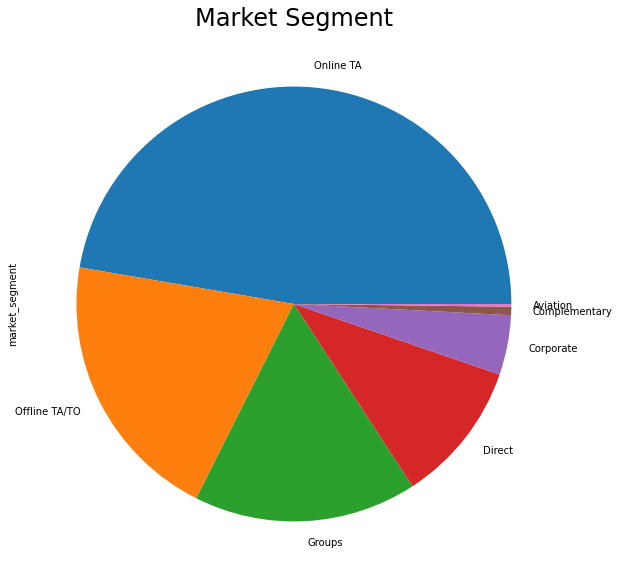

In [ ]:
plt.figure(figsize=(20,10))
market_segment_df.plot(kind='pie')
plt.title('Market Segment',size = 24)
plt.show()

# Online TA is most popular and offline TA/TO is 2nd most popular market segment among all

In [ ]:
df = hotel_df[['market_segment','is_canceled']]

In [ ]:
df.head()

,market_segment,is_canceled
0,Direct,0
1,Direct,0
2,Direct,0
3,Corporate,0
4,Online TA,0


In [ ]:
df.set_index('market_segment',inplace=True)

In [ ]:
df.head()

,is_canceled
market_segment,
Direct,0
Direct,0
Direct,0
Corporate,0
Online TA,0


In [ ]:
df = df.groupby('market_segment')['is_canceled'].value_counts().unstack().rename(columns={0:'not_cancled',1:'actually_cancled'})

In [ ]:
df

is_canceled,not_cancled,actually_cancled
market_segment,,
Aviation,185.0,52.0
Complementary,646.0,97.0
Corporate,4303.0,992.0
Direct,10672.0,1934.0
Groups,7714.0,12097.0
Offline TA/TO,15908.0,8311.0
Online TA,35738.0,20739.0
Undefined,NaN,2.0


In [ ]:
df = df.drop(index=['Undefined'])

In [ ]:
df

is_canceled,not_cancled,actually_cancled
market_segment,,
Aviation,185.0,52.0
Complementary,646.0,97.0
Corporate,4303.0,992.0
Direct,10672.0,1934.0
Groups,7714.0,12097.0
Offline TA/TO,15908.0,8311.0
Online TA,35738.0,20739.0


In [ ]:
df.describe()

is_canceled,not_cancled,actually_cancled
count,7.000000,7.000000
mean,10738.000000,6317.428571
std,12352.471615,7862.182243
min,185.000000,52.000000
25%,2474.500000,544.500000
50%,7714.000000,1934.000000
75%,13290.000000,10204.000000
max,35738.000000,20739.000000


In [ ]:
market_ac = df.actually_cancled

In [ ]:
market_ac

market_segment
Aviation            52.0
Complementary       97.0
Corporate          992.0
Direct            1934.0
Groups           12097.0
Offline TA/TO     8311.0
Online TA        20739.0
Name: actually_cancled, dtype: float64

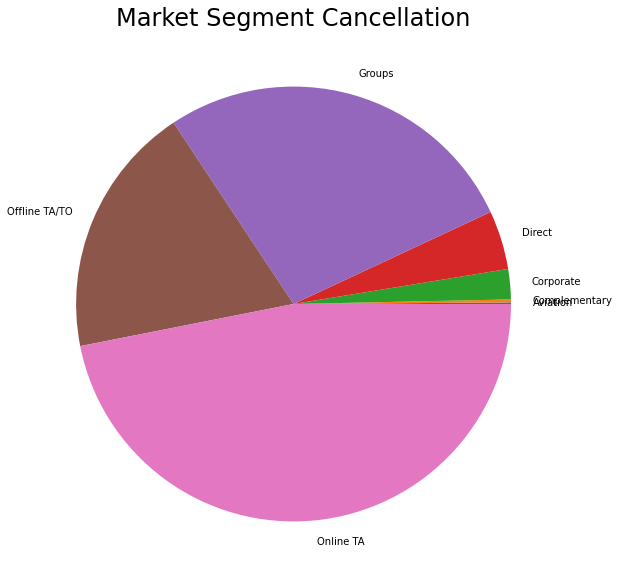

In [ ]:
plt.figure(figsize=(20,10))
market_ac.plot(kind='pie')
plt.title('Market Segment Cancellation',size = 24)
plt.ylabel("")
plt.show()

# Online TA market segment got Cancled the most

#5.Which meal plan is most preferred by different customer types?

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
df = hotel_df[['meal','customer_type']]

In [ ]:
df.head()

,meal,customer_type
0,BB,Transient
1,BB,Transient
2,BB,Transient
3,BB,Transient
4,BB,Transient


In [ ]:
df.set_index('meal', inplace=True)

In [ ]:
 df = df.groupby('meal')['customer_type'].value_counts().unstack()

In [ ]:
df

customer_type,Contract,Group,Transient,Transient-Party
meal,,,,
BB,3260,499,70692,17859
FB,5,1,547,245
HB,613,36,8020,5794
SC,183,39,9968,460
Undefined,15,2,386,766


In [ ]:
df.drop(index=['Undefined'],inplace=True)

In [ ]:
df

customer_type,Contract,Group,Transient,Transient-Party
meal,,,,
BB,3260,499,70692,17859
FB,5,1,547,245
HB,613,36,8020,5794
SC,183,39,9968,460


In [ ]:
group_df = df.Group

In [ ]:
group_df

meal
BB    499
FB      1
HB     36
SC     39
Name: Group, dtype: int64

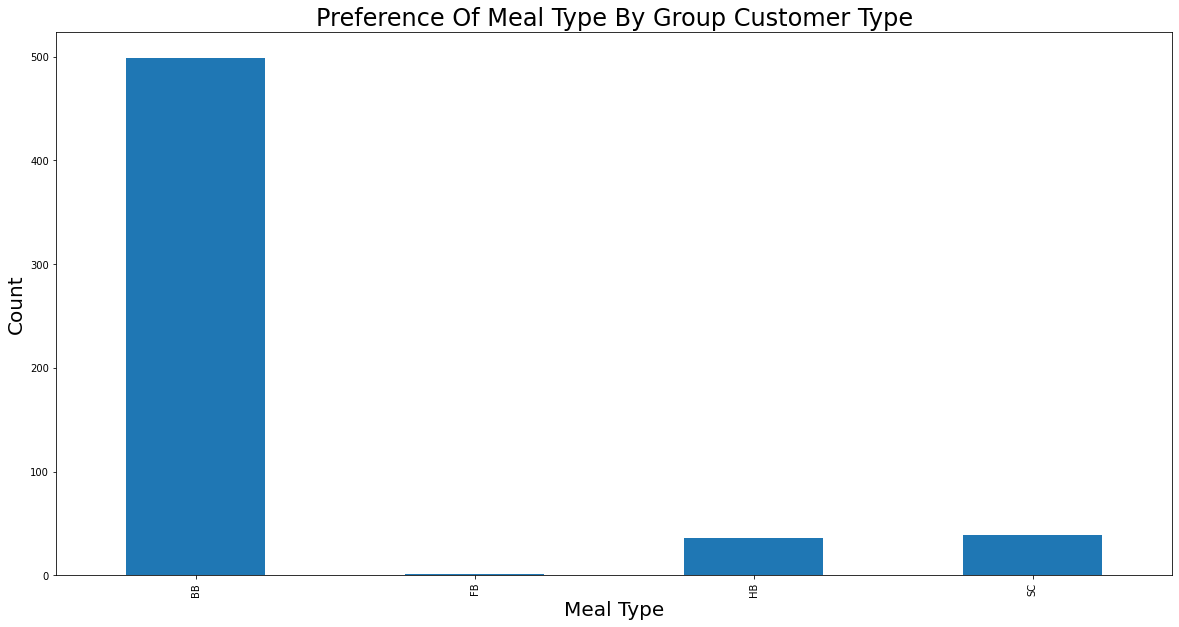

In [ ]:
plt.figure(figsize=(20,10))
group_df.plot(kind='bar')
plt.xlabel('Meal Type',size=20)
plt.ylabel('Count', size = 20)
plt.title("Preference Of Meal Type By Group Customer Type",size = 24)
plt.show()

In [ ]:
contract_df  =  df.Contract


In [ ]:
contract_df

meal
BB    3260
FB       5
HB     613
SC     183
Name: Contract, dtype: int64

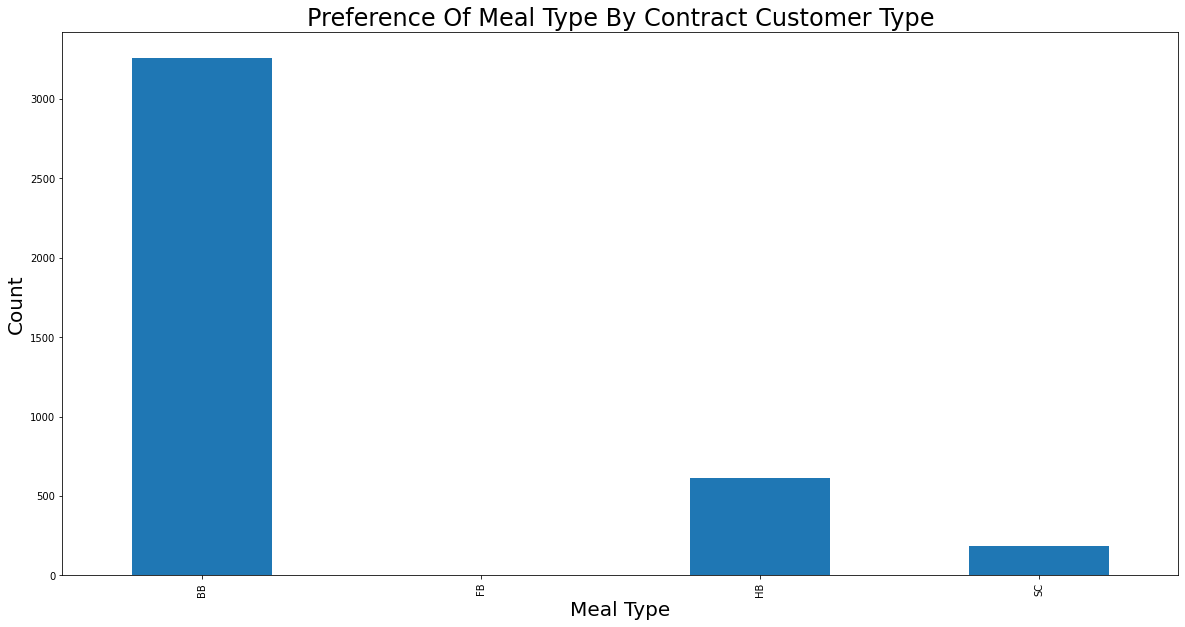

In [ ]:
plt.figure(figsize=(20,10))
contract_df.plot(kind='bar')
plt.xlabel('Meal Type',size=20)
plt.ylabel('Count', size = 20)
plt.title("Preference Of Meal Type By Contract Customer Type",size = 24)
plt.show()

In [ ]:
transient_df = df.Transient

In [ ]:
transient_df

meal
BB    70692
FB      547
HB     8020
SC     9968
Name: Transient, dtype: int64

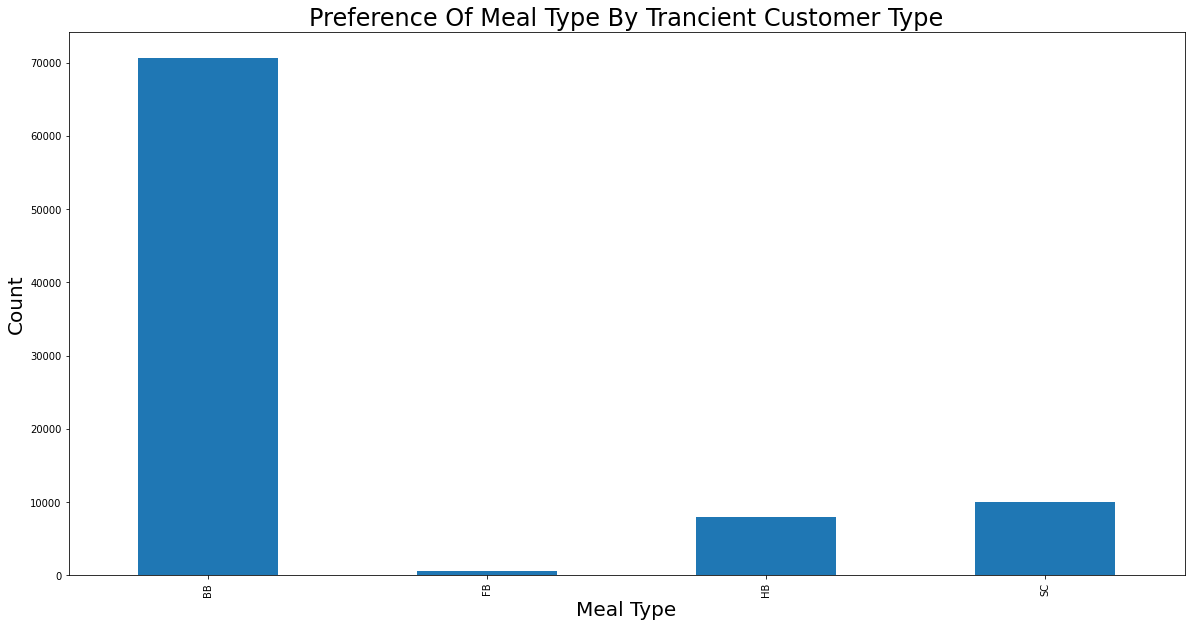

In [ ]:
plt.figure(figsize=(20,10))
transient_df.plot(kind='bar')
plt.xlabel('Meal Type',size=20)
plt.ylabel('Count', size = 20)
plt.title("Preference Of Meal Type By Trancient Customer Type",size = 24)
plt.show()

In [ ]:
tp_df = df['Transient-Party']


In [ ]:
tp_df

meal
BB    17859
FB      245
HB     5794
SC      460
Name: Transient-Party, dtype: int64

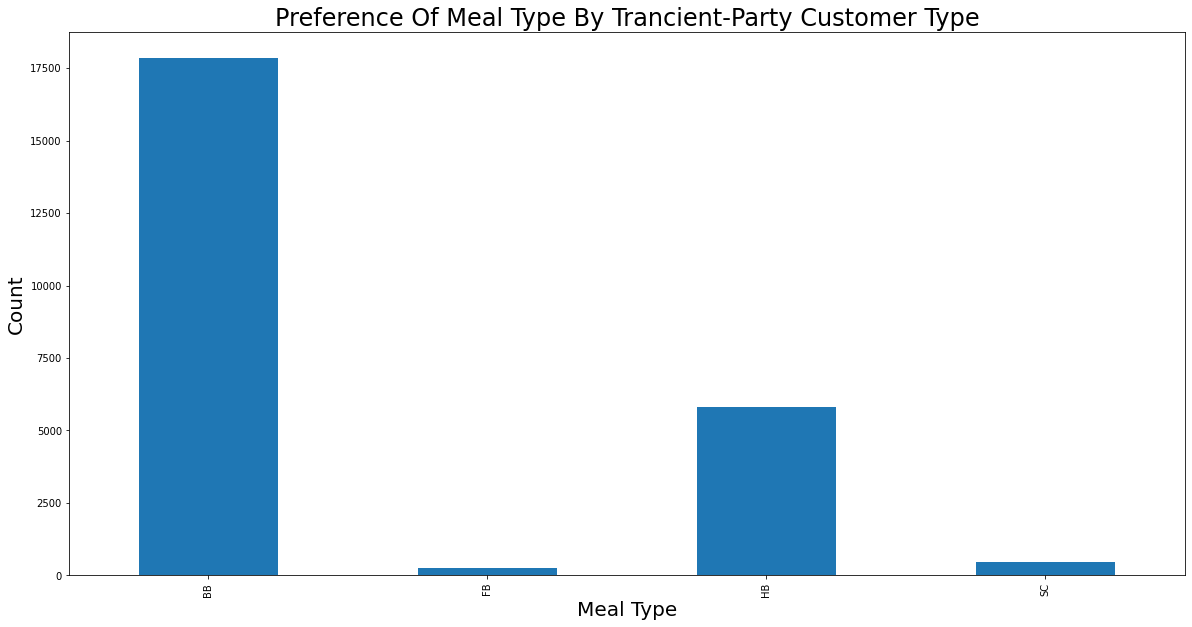

In [ ]:
plt.figure(figsize=(20,10))
tp_df.plot(kind='bar')
plt.xlabel('Meal Type',size=20)
plt.ylabel('Count', size = 20)
plt.title("Preference Of Meal Type By Trancient-Party Customer Type",size = 24)
plt.show()

# BB Meal type is most preferred by all customer Type
# And FB is least preferred by different customer type

#What type of deposit is most preferred by the people?

In [ ]:
hotel_df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,7/1/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,7/2/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,7/3/2015


In [ ]:
deposit_type_df = hotel_df.deposit_type.value_counts(normalize=True)

In [ ]:
deposit_type_df

No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: deposit_type, dtype: float64

# No deposite is most preferred by the people 
#out of all deposite 87.5% people prefer No deposite and only 1.3% people prefer Refundable deposite type

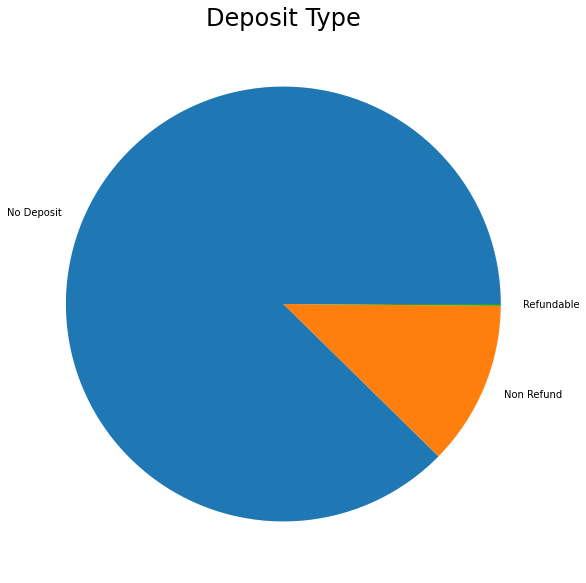

In [ ]:
plt.figure(figsize=(20,10))
deposit_type_df.plot(kind='pie')
plt.title('Deposit Type',size = 24)
plt.ylabel("")
plt.show()